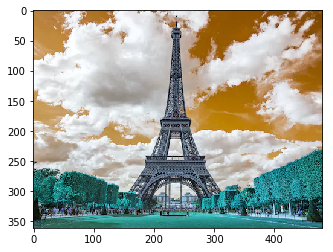

In [1]:
#Import Libraries
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

#Load Images
image=cv2.imread("Downloads\\eiffel tower.png")
plt.imshow(image)


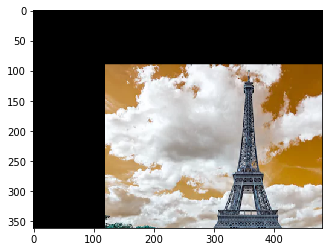

In [2]:
import numpy as np
height,width = image.shape[:2]
Quarter_height, Quarter_width=  height/4, width/4
T= np.float32([[1,0,Quarter_width],[0,1,Quarter_height]])
img_trans=cv2.warpAffine(image,T,(width,height))
plt.imshow(img_trans)
#cv2.imshow("image transformation", img_trans)
#cv2.waitKey(0)
#cv2.destroyAllWindows()

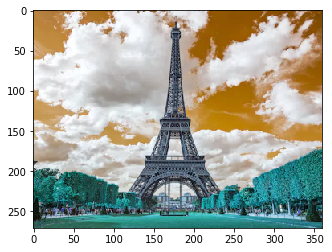

In [3]:
#re-size
#img_res= cv2.resize(image,size(output image size),X size,Y size, interpolation)

img_res= cv2.resize(image,None,fx=0.75,fy=0.75)
plt.imshow(img_res)
cv2.imshow("3/4th image", img_res)
cv2.waitKey(0)
cv2.destroyAllWindows()

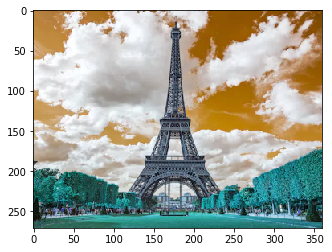

In [4]:
#Double the image:
img_doub= cv2.resize(image,None,fx=2,fy=2, interpolation= cv2.INTER_CUBIC)
plt.imshow(img_res)
cv2.imshow("double the image", img_doub)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [ ]:
#spin image
height, width = image.shape[:2]
rotation_center_x, rotation_center_y= width/2,height/2

Rotation_matrix= cv2.getRotationMatrix2D((rotation_center_x,rotation_center_y),90,1.0)
image_spin= cv2.warpAffine(image, Rotation_matrix,(width,height))
plt.imshow(image_spin)
cv2.imshow("spin image", image_spin)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [ ]:
smaller = cv2.pyrDown(image)
larger = cv2.pyrUp(smaller)

cv2.imshow('Original', image )

cv2.imshow('Smaller ', smaller )
cv2.imshow('Larger ', larger )
cv2.waitKey(0)
cv2.destroyAllWindows()
plt.imshow(smaller)


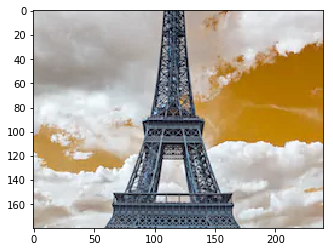

In [5]:
#Cropping
# Let's get the starting pixel coordiantes (top  left of cropping rectangle)
start_row, start_col = int(height * .25), int(width * .25)
# Let's get the ending pixel coordinates (bottom right)
end_row, end_col = int(height * .75), int(width * .75)
# Simply use indexing to crop out the rectangle we desire
cropped = image[start_row:end_row , start_col:end_col]
cv2.imshow("Original Image", image)
cv2.waitKey(0) 
cv2.imshow("Cropped Image", cropped) 
cv2.waitKey(0) 
cv2.destroyAllWindows()
plt.imshow(cropped)

In [ ]:
#Masking
# Making a sqare
#square = np.zeros((300, 300), np.uint8)
square=cv2.rectangle(image, (50, 50), (250, 250), 255, -2)
cv2.imshow("Square", square)
cv2.waitKey(0)
cv2.destroyAllWindows()


In [ ]:
# Making a ellipse
#ellipse = np.zeros((300, 300), np.uint8)
ellipse=cv2.ellipse(image, (150, 150), (150, 150), 30, 0, 180, 255, -1)
cv2.imshow("Ellipse", ellipse)
cv2.waitKey(0)
cv2.destroyAllWindows()


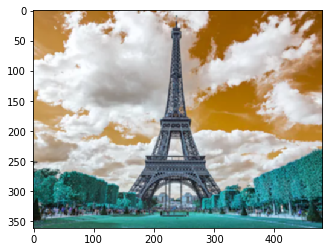

In [6]:
img_blur=cv2.blur(image,(3,3))
cv2.imshow("blur transformation", img_blur)
cv2.waitKey(0)
cv2.destroyAllWindows()
plt.imshow(img_blur)

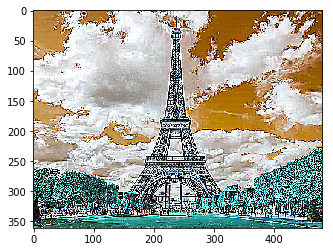

In [7]:
#sharpning
kernel_sharpening= np.array([[-1,-1,-1],[-1,9,-1],[-1,-1,-1]])
Sharpened=cv2.filter2D(image,-1,kernel_sharpening)
cv2.imshow("sharpening image", Sharpened)
cv2.waitKey(0)
cv2.destroyAllWindows()
plt.imshow(Sharpened)


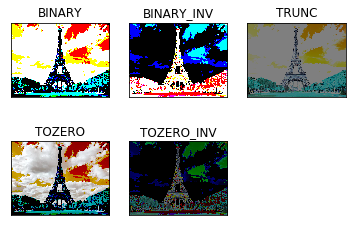

In [15]:
#threshold

#value below 127 geos to 0
ret, thresh1=cv2.threshold(image,127,255, cv2.THRESH_BINARY)
#value below 127 geos to 255 and values above 127 go to 0
ret, thresh2=cv2.threshold(image,127,255, cv2.THRESH_BINARY_INV)
#value below 127 are truncated at 127
ret, thresh3=cv2.threshold(image,127,255, cv2.THRESH_TRUNC)
#value below 127 geos to 0, above 127 are unchanged
ret, thresh4=cv2.threshold(image,127,255, cv2.THRESH_TOZERO)
#reverser of above, below 127 is unchanged, above 127 goes to 0
ret, thresh5=cv2.threshold(image,127,255, cv2.THRESH_TOZERO_INV)
#cv2.imshow("threshold image",thresh5)
#cv2.waitKey(0)
#cv2.destroyAllWindows()


titles = ['BINARY','BINARY_INV','TRUNC','TOZERO','TOZERO_INV']
images = [thresh1, thresh2, thresh3, thresh4, thresh5]
for i in range(5):
    plt.subplot(2,3,i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()

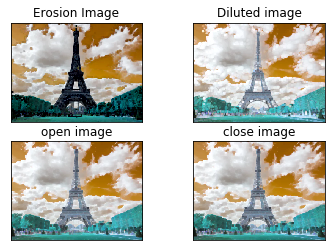

In [13]:
kernel=np.ones((5,5),np.uint8)

#erosion
#cv2.erode(img,kernal,iteration=1)
er_img=cv2.erode(image,kernel,1)
#cv2.imshow("er image",er_img)
#cv2.waitKey(0)

#Diluion
#cv2.dilate(img,kernal,iterations=1)
dil_img=cv2.dilate(image,kernel,1)
#cv2.imshow("d image",dil_img)
#cv2.waitKey(0)

#Opening
#cv2.morphologyEx(image, cv2.MORPH_CLOSE, kernel)
open_img=cv2.morphologyEx(image, cv2.MORPH_CLOSE, kernel)
#cv2.imshow("open image",open_img)
#cv2.waitKey(0)

#closing
#cv2.morphologyEx(image, cv2.MORPH_OPEN, kernel)
close_img=cv2.morphologyEx(image, cv2.MORPH_CLOSE, kernel)
#cv2.imshow("close image",close_img)
#cv2.waitKey(0)
#cv2.destroyAllWindows()

titles = ['Erosion Image', 'Diluted image',
            'open image', 'close image']
images = [er_img, dil_img, open_img, close_img]
for i in range(4):
    plt.subplot(2,2,i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()